# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)

628

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
cityObjs = []

for city in cities:
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    #print(query_url)
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    try:
        cityName = weather_json['name']
        cityNum = cities.index(city)
        # latitude
        cityLat = weather_json['coord']['lat']
        # longitude
        cityLon = weather_json['coord']['lon']
        # max temp
        maxTemp = weather_json['main']['temp_max']
        # humidity
        humidity = weather_json['main']['humidity']
        # cloudiness
        cloudiness = weather_json['clouds']['all']
        # wind speed
        speed = weather_json['wind']['speed']
        # date
        date = weather_json['dt']
        cityObjs.append({
            'Name' : cityName,
            'Latitude' : cityLat,
            'Longitude' : cityLon,
            'Maximum Temperature' : maxTemp,
            'Humidity' : humidity,
            'Cloudiness' : cloudiness,
            'Wind Speed' : speed,
            'Date' : date
        })
        pprint(f"Getting info for {cityName}")
    except KeyError:
        pprint("No records found")

'Getting info for Zhigansk'
'Getting info for Bluff'
'Getting info for São João da Barra'
'Getting info for Barrow'
'Getting info for Rikitea'
'Getting info for Albany'
'Getting info for Chokurdakh'
'Getting info for Port Alfred'
'Getting info for Elban'
'Getting info for Leningradskiy'
'Getting info for Amapá'
'Getting info for Cape Town'
'Getting info for Qaanaaq'
'Getting info for Butaritari'
'Getting info for Thompson'
'Getting info for Xining'
'Getting info for Geraldton'
'Getting info for Betioky'
'Getting info for Felanitx'
'Getting info for San Benito'
'Getting info for Tamiahua'
'Getting info for Takoradze'
'Getting info for Mar del Plata'
'No records found'
'Getting info for Ponta do Sol'
'Getting info for Billings Metropolitan Area'
"Getting info for Sinegor'ye"
'Getting info for Port Elizabeth'
'Getting info for Honiara'
'Getting info for Port Hardy'
'Getting info for Ambulu'
'Getting info for Rafaela'
'Getting info for Saint-Philippe'
'Getting info for Saint-Joseph'
'Getti

'Getting info for Gladstone'
'Getting info for Dolinsk'
'No records found'
'Getting info for Orchard Homes'
'Getting info for Ovruch'
'Getting info for Khorixas'
'Getting info for Iquique'
'Getting info for Yumen'
'No records found'
'Getting info for Ginir'
'Getting info for Rørvik'
'Getting info for Necochea'
'Getting info for Kaka'
'Getting info for Vestmannaeyjar'
'Getting info for Salaverry'
'No records found'
'Getting info for Treinta y Tres'
'Getting info for Sept-Îles'
'Getting info for Havre-St-Pierre'
'Getting info for Jijiang'
'Getting info for Commerce'
'Getting info for Province of Mantua'
'Getting info for Diamantino'
'Getting info for Tasiilaq'
'Getting info for Channel-Port aux Basques'
'Getting info for Frontera'
'Getting info for Ancud'
'Getting info for Sisimiut'
'Getting info for Lompoc'
'Getting info for Dedza'
'Getting info for Kerema'
'No records found'
'Getting info for São Sepé'
'Getting info for Sørland'
'Getting info for Buala'
'Getting info for Along'
'Gettin

'Getting info for Poyarkovo'
'Getting info for Pontianak'
'Getting info for Biltine'
'Getting info for Caruray'
'No records found'
'Getting info for Jagdalpur'
'Getting info for Shimoda'
'Getting info for Monte Carmelo'
'Getting info for Los Llanos de Aridane'
'Getting info for Marzuq'
'Getting info for Tulsīpur'
'Getting info for Kopervik'
'Getting info for Villa Guerrero'
'Getting info for Harper'
'Getting info for Talara'
'Getting info for Jacksonville'
'No records found'
'Getting info for Vila Velha'
'Getting info for Opuwo'
'Getting info for Nizhniy Kuranakh'
'Getting info for Tessalit'
'Getting info for Montepuez'
'Getting info for Kidal'
'Getting info for Praia da Vitória'
'No records found'
'Getting info for Saint-François'
'Getting info for Wilmington Island'
'Getting info for Derzhavīnsk'
'Getting info for Cedar Lake'
'Getting info for Fujin'
'No records found'
'Getting info for Springbok'
'Getting info for Araouane'
'Getting info for Muriti'
'Getting info for Sidi Ali'
'Gett

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
cityDF = pd.DataFrame(cityObjs)

#cityDF
cityDF.head()
#cityDF.count()
cityDF.to_csv("city_dataframe.csv", encoding="utf-8", index=False)
#cityDFcsv = cityDF
#cityDFcsv.to_csv("city_dataframe.csv", encoding="utf-8", index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#loc?
humidity99DF = cityDF.loc[cityDF['Humidity'] <= 100,:]
humidity99DF
#humidity99DF.count()

,Name,Latitude,Longitude,Maximum Temperature,Humidity,Cloudiness,Wind Speed,Date
0,Zhigansk,66.7697,123.3711,290.60,73,5,0.89,1658946195
1,Bluff,-46.6000,168.3333,281.93,88,100,5.14,1658946196
2,São João da Barra,-21.6403,-41.0511,299.20,65,4,5.46,1658946059
3,Barrow,71.2906,-156.7887,274.00,97,100,6.03,1658945961
4,Rikitea,-23.1203,-134.9692,296.46,71,95,5.89,1658946076
...,...,...,...,...,...,...,...,...
572,Springbok,-29.6643,17.8865,283.95,42,0,1.46,1658946345
573,Araouane,18.9048,-3.5265,315.29,6,11,2.30,1658946345
574,Muriti,-1.9833,32.9167,296.44,62,88,3.07,1658946345
575,Sidi Ali,36.0998,0.4206,300.07,54,0,2.81,1658946346


In [6]:
#  Get the indices of cities that have humidity over 100%.
cityDF.loc[cityDF['Humidity'] > 100,:].index.tolist()

[]

In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
cleanCityData = cityDF.loc[cityDF['Humidity'] <= 100,:]
cleanCityData.head()

,Name,Latitude,Longitude,Maximum Temperature,Humidity,Cloudiness,Wind Speed,Date
0,Buala,-8.1450,159.5921,298.86,81,12,2.48,1658943677
1,Albany,42.6001,-73.9662,300.40,50,99,0.29,1658943479
2,Busselton,-33.6500,115.3333,284.75,75,85,3.81,1658943550
3,Yinchuan,38.4681,106.2731,297.78,34,1,4.46,1658943677
4,Hermanus,-34.4187,19.2345,285.82,76,0,5.57,1658943678


In [8]:
lat = cleanCityData['Latitude']
maxTemp = cleanCityData['Maximum Temperature']
humid = cleanCityData['Humidity']
clouds = cleanCityData['Cloudiness']
windspd = cleanCityData['Wind Speed']

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

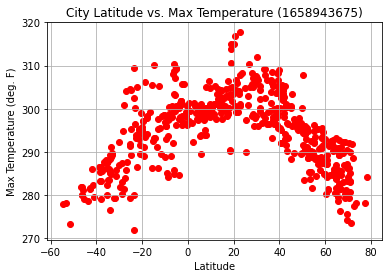

In [9]:
plt.scatter(lat, maxTemp, c="red")
plt.title(f"City Latitude vs. Max Temperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (deg. F)")
plt.grid()
plt.show()

In [10]:
plt.savefig("lat_vs_maxTemp.png")
print("The above plot shows the latitude position of a city against the maximum temperature of that city in degrees Fahrenheit.")

The above plot shows the latitude position of a city against the maximum temperature of that city in degrees Fahrenheit.


<Figure size 432x288 with 0 Axes>

## Latitude vs. Humidity Plot

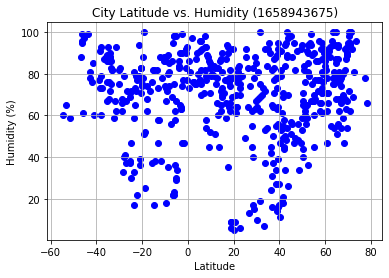

In [11]:
plt.scatter(lat, humid, c="blue")
plt.title(f"City Latitude vs. Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.show()

In [12]:
plt.savefig("lat_vs_humidity.png")
print("The above plot shows the latitude position of a city against the percentage humidity of that city.")

The above plot shows the latitude position of a city against the percentage humidity of that city.


<Figure size 432x288 with 0 Axes>

## Latitude vs. Cloudiness Plot

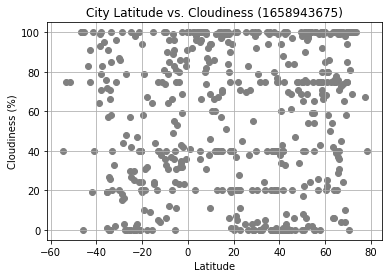

In [13]:
plt.scatter(lat, clouds, c="gray")
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.show()

In [14]:
plt.savefig("lat_vs_cloudiness.png")
print("The above plot shows the latitude position of a city against the percent cloudiness in that city.")

The above plot shows the latitude position of a city against the percent cloudiness in that city.


<Figure size 432x288 with 0 Axes>

## Latitude vs. Wind Speed Plot

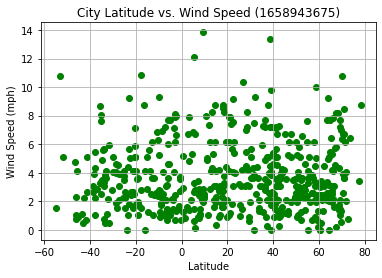

In [15]:
plt.scatter(lat, windspd, c="green")
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.show()

In [16]:
plt.savefig("lat_vs_windSpd.png")
print("The above plot shows the latitude position of a city against the wind speed of that city in miles per hour.")

The above plot shows the latitude position of a city against the wind speed of that city in miles per hour.


<Figure size 432x288 with 0 Axes>

## Linear Regression

In [17]:
posCleanCityData = cleanCityData.loc[cleanCityData["Latitude"]>=0,:]
negCleanCityData = cleanCityData.loc[cleanCityData["Latitude"]<=0,:]
posCleanCityData.head()

,Name,Latitude,Longitude,Maximum Temperature,Humidity,Cloudiness,Wind Speed,Date
1,Albany,42.6001,-73.9662,300.40,50,99,0.29,1658943479
3,Yinchuan,38.4681,106.2731,297.78,34,1,4.46,1658943677
9,Eureka,40.8021,-124.1637,292.15,82,60,1.79,1658943470
13,Ribeira Grande,38.5167,-28.7000,299.37,78,40,7.20,1658943681
16,Manaure,11.7751,-72.4445,305.24,51,60,7.36,1658943682


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4898920723786767


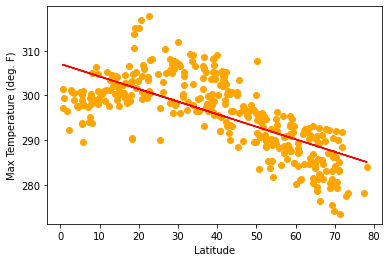

The plot regression describes the relationship between latitude and max temperature; there is a negative correlation because higher latitudes generally correlate to lower maximum temperatures.


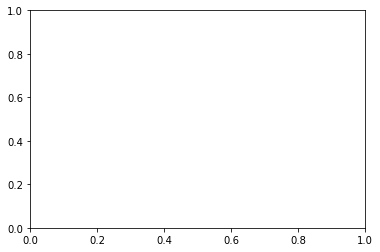

In [18]:
posLat = posCleanCityData["Latitude"]
maxTemp = posCleanCityData["Maximum Temperature"]
x_values = posLat
y_values = maxTemp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, c="orange")
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (deg. F)')
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.savefig("poslat_vs_maxtemp.png")
print("The plot regression describes the relationship between latitude and max temperature; there is a negative correlation because higher latitudes generally correlate to lower maximum temperatures.")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5086116746834246


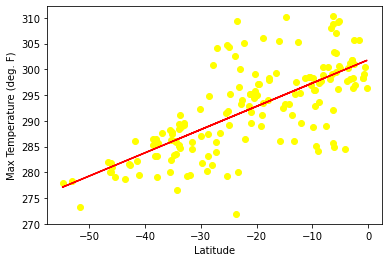

The plot regression describes the relationship between latitude and max temperature; there is a positive correlation because higher latitudes below zero generally correlate to higher maximum temperatures.


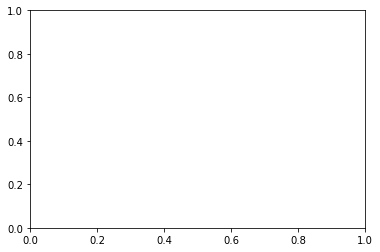

In [19]:
negLat = negCleanCityData["Latitude"]
maxTemp = negCleanCityData["Maximum Temperature"]
x_values = negLat
y_values = maxTemp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, c="yellow")
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (deg. F)')
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.savefig("neglat_vs_maxTemp.png")
print("The plot regression describes the relationship between latitude and max temperature; there is a positive correlation because higher latitudes below zero generally correlate to higher maximum temperatures.")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.011236953828075559


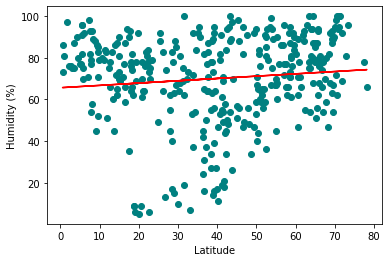

The plot regression describes the relationship between latitude and humidity; there seems to be a slight negative relation for the two.


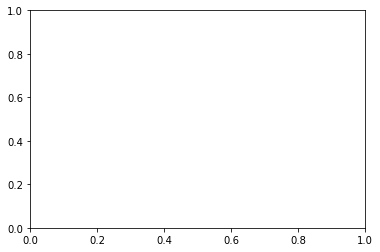

In [20]:
posLat = posCleanCityData["Latitude"]
humidity = posCleanCityData["Humidity"]
x_values = posLat
y_values = humidity
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, c="teal")
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.savefig("poslat_vs_humidity.png")
print("The plot regression describes the relationship between latitude and humidity; there seems to be a slight negative relation for the two.")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.029748335340270663


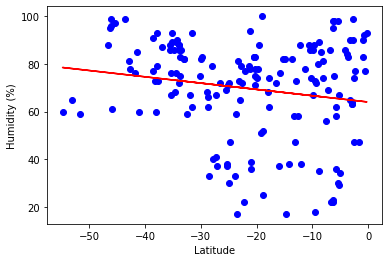

The plot regression describes the relationship between latitude and humidity; there seems to be a negative correlation between latitude below 0 and humidity, so higher latitude corresopnds to lower humidity.


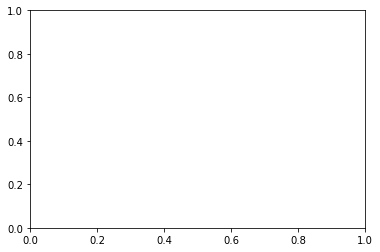

In [21]:
negLat = negCleanCityData["Latitude"]
humidity = negCleanCityData["Humidity"]
x_values = negLat
y_values = humidity
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, c="blue")
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.savefig("neglat_vs_Humidities y.png")
print("The plot regression describes the relationship between latitude and humidity; there seems to be a negative correlation between latitude below 0 and humidity, so higher latitude corresopnds to lower humidity.")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0007069469931475453


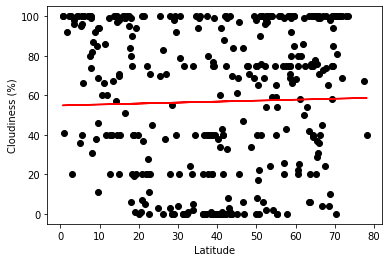

The plot regression describes the relationship between latitude and cloudiness; there appears to be a negative correlation due to the line of best fit, but there truly seems to be no correlation when looking at individual datapoints.


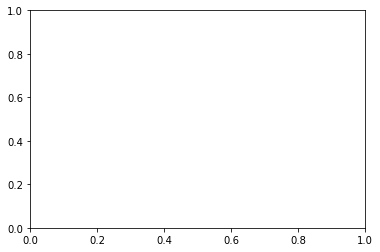

In [22]:
posLat = posCleanCityData["Latitude"]
clouds = posCleanCityData["Cloudiness"]
x_values = posLat
y_values = clouds
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, c="black")
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.savefig("poslat_vs_cloud.png")
print("The plot regression describes the relationship between latitude and cloudiness; there appears to be a negative correlation due to the line of best fit, but there truly seems to be no correlation when looking at individual datapoints.")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.002984208576788919


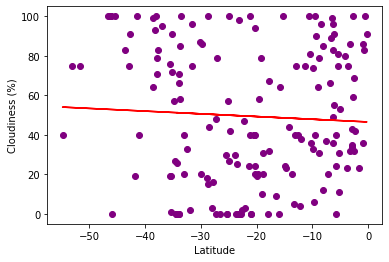

The plot regression describes the relationship between latitude and cloudiness; higher latitude below 0 (less negative) corresponds to more cloudiness.


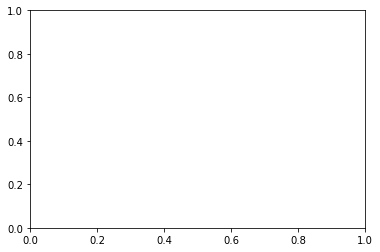

In [23]:
negLat = negCleanCityData["Latitude"]
clouds = negCleanCityData["Cloudiness"]
x_values = negLat
y_values = clouds
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, c="purple")
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.savefig("neglat_vs_cloud.png")
print("The plot regression describes the relationship between latitude and cloudiness; higher latitude below 0 (less negative) corresponds to more cloudiness.")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0002323866096446418


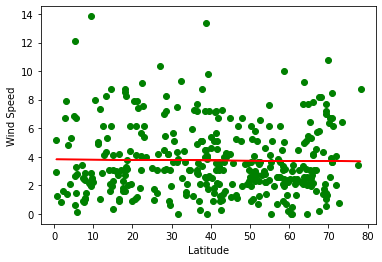

The plot regression describes the relationship between latitude and wind; there appears to be a positive correlation between the two.


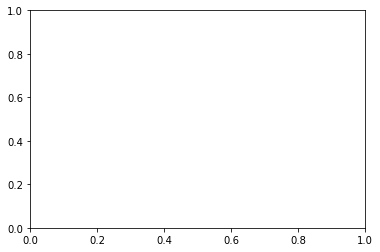

In [24]:
posLat = posCleanCityData["Latitude"]
windspd = posCleanCityData["Wind Speed"]
x_values = posLat
y_values = windspd
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, c="green")
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.savefig("poslat_vs_windspd.png")
print("The plot regression describes the relationship between latitude and wind; there appears to be a positive correlation between the two.")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.00034130741730663603


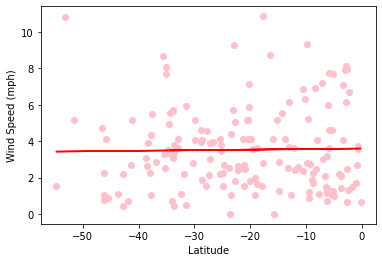

The plot regression describes the relationship between latitude and wind speed; higher latitude below 0 (less negative) tends to have lower humidity.


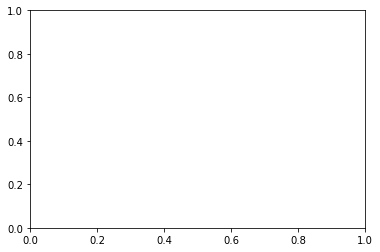

In [25]:
negLat = negCleanCityData["Latitude"]
windspd = negCleanCityData["Wind Speed"]
x_values = negLat
y_values = windspd
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, c="pink")
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.savefig("neglat_vs_windspd.png")
print("The plot regression describes the relationship between latitude and wind speed; higher latitude below 0 (less negative) tends to have lower humidity.")